<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_1/3_math_calculo_geron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>


# Class 1 Matemáticas y Cálculo para ciencia de datos

## [Primer video de apoyo a la lectura](https://www.youtube.com/watch?v=iLiCS1gKKY4) 

## Objetivos:

Introducir Python a través del cuaderno Jupyter de Gerón sobre matematicas y cálculo para científicos de datos. 

https://github.com/ageron/handson-ml2/blob/master/math_differential_calculus.ipynb


## Lista de los estudiantes

In [8]:
import pandas as pd
intro_ml = pd.read_csv('intro_ml.csv', sep = ',')


El cálculo es el estudio del cambio continuo.

Tiene dos subcampos principales:  

* **cálculo diferencial**, que estudia la tasa de cambio de funciones, y 
* **cálculo integral**, que estudia el área bajo la curva. 

En este cuaderno, discutiremos el primero.

El cálculo diferencial es el núcleo del **aprendizaje profundo(Deep learning)**, por lo que es importante comprender  

* qué son las derivadas y los gradientes, 
* cómo se usan en el aprendizaje profundo (Deep Learning) y 
* comprender cuáles son sus limitaciones.

## Nota:  

el código de este cuaderno solo se usa para crear figuras y animaciones.

No es necesario que entienda cómo funciona (aunque hice todo lo posible para dejarlo claro, en caso de que esté interesado).

## Slope of a straight line

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Para obtener animaciones fluidas

In [2]:
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

¿Cuál es la pendiente de la siguiente recta?

In [3]:
def get_AB_line(A_pos, B_pos, x_min=-1000, x_max=+1000):
    """
    A_pos es un arreglo de numpy que indica un punto del plano.
    B_pos es una arreglo de numpy que indica un segundo punto de la recta AB
    """
    rise = B_pos[1] - A_pos[1]
    run = B_pos[0] - A_pos[0]
    slope = rise / run
    offset = A_pos[1] - slope * A_pos[0]   # intersecto b de la recta
    return [x_min, x_max], [x_min * slope + offset, x_max * slope + offset]

In [4]:
def plot_AB_line(A_pos, B_pos, A_name="A", B_name="B"):
    for point, name in ((A_pos, A_name), (B_pos, B_name)):
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    xs, ys = get_AB_line(A_pos, B_pos)
    plt.plot(xs, ys)

In [5]:
def plot_rise_over_run(A_pos, B_pos):                        # trazar ascenso sobre avance 
    plt.plot([A_pos[0], B_pos[0]], [A_pos[1], A_pos[1]], "k--")
    plt.text((A_pos[0] + B_pos[0]) / 2, A_pos[1] - 0.4, "run", fontsize=14)
    plt.plot([B_pos[0], B_pos[0]], [A_pos[1], B_pos[1]], "k--")
    plt.text(B_pos[0] + 0.2, (A_pos[1] + B_pos[1]) / 2, "rise", fontsize=14)

In [6]:
def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

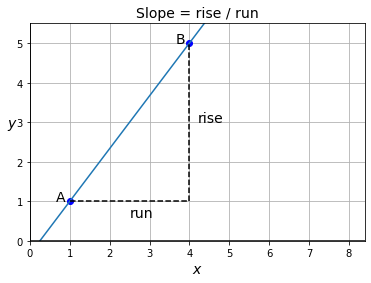

In [7]:
A_pos = np.array([1, 1])
B_pos = np.array([4, 5])
plot_AB_line(A_pos, B_pos)
plot_rise_over_run(A_pos, B_pos)
show([0, 8.4, 0, 5.5], title="Slope = rise / run")

Como probablemente sepa, la pendiente de una línea recta (no vertical) se puede calcular tomando dos puntos cualesquiera $A$ y $B$ en la línea y calculando la "elevación sobre el recorrido":

$$ \text{slope} = \frac{\text{rise}}{\text{run}} = \frac{\Delta y}{\Delta x} = \frac{y_{B} - y_{A}}{x_{B} - x_{A}} $$

En este ejemplo, la elevación es 4 y el avance es 3, por lo que la pendiente es 4/3 = 1.333...

# Defining the slope of a curve

Pero, ¿y si quieres saber la pendiente de algo más que una línea recta?

Por ejemplo, consideremos la curva definida por $y = f(x) = x^{2}$.

In [ ]:
#@title
xs = np.linspace(-2.1, 2.1, 500)
ys = xs**2
plt.plot(xs, ys)

plt.plot([0, 0], [0, 3], "k--") # para resaltar el eje x
plt.arrow(-1.4, 2.5, 0.5, -1.3, head_width=0.1)
plt.arrow(0.85, 1.05, 0.5, 1.3, head_width=0.1)
show([-2.1, 2.1, 0, 2.8], title="Slope of the curve $y = x^2$")

Obviamente, la pendiente varía:   
* a la izquierda (es decir, cuando $x < 0$), la pendiente es negativa (es decir, cuando nos movemos de izquierda a derecha, la curva desciende),  
* mientras que a la derecha (es decir, cuando $ x > 0$ ) la pendiente es positiva (es decir, cuando nos movemos de izquierda a derecha, la curva sube).

En el punto $x = 0$, la pendiente es igual a 0 (es decir, la curva es localmente plana).

El hecho de que la pendiente sea 0 cuando alcanzamos un mínimo (o incluso un máximo) es de crucial importancia, y volveremos a ello más adelante.

¿Cómo podemos poner números a estas intuiciones?

Bueno, digamos que queremos estimar la pendiente de la curva en un punto $A$, podemos hacerlo tomando otro punto $B$ en la curva, no muy lejos, y luego calculando la pendiente entre estos dos puntos:

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
def animate_AB_line(f, fp, f_str, x_A, axis=None):  
    '''
    f debe ser una función lambda de python
    fp es una función lambda que representa la derivada de f
    '''
    y_A = f(x_A)
    eps = 1e-4
    x_B_range = 1.5
    x_B = x_A + eps

    n_frames = 200
    text_offset_A = -0.2
    text_offset_B = +0.1
    x_min, x_max = -1000, 1000

    fig, ax = plt.subplots()

    # plot f(x)
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax.plot(xs, ys)

    # plot the tangent to the curve at point A
    if fp:
        slope = fp(x_A)
        offset = y_A - slope * x_A
        ax.plot([x_min, x_max], [slope*x_min + offset, slope*x_max + offset],
                "y--")

    # plot the line AB and the labels A and B so they can be animated
    y_A = f(x_A)
    y_B = f(x_B)
    xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
    line_inf, = ax.plot(xs, ys, "-")
    line_AB, = ax.plot([x_A, x_B], [y_A, y_B], "bo-")
    ax.text(x_A + text_offset_A, y_A, "A", fontsize=14)
    B_text = ax.text(x_B + text_offset_B, y_B, "B", fontsize=14)

    # plot the grid and axis labels
    title = r"Slope of the curve $y = {}$ at $x_\mathrm{{A}} = {}$".format(f_str, x_A)
    show(axis or [-2.1, 2.1, 0, 2.8], title=title)

    def update_graph(i):
        x_B = x_A + x_B_range * np.cos(i * 2 * np.pi / n_frames) ** 3
        if np.abs(x_B - x_A) < eps:
            x_B = x_A + eps # to avoid division by 0
        y_B = f(x_B)
        xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
        line_inf.set_data(xs, ys)
        line_AB.set_data([x_A, x_B], [y_A, y_B])
        B_text.set_position([x_B + text_offset_B, y_B])
        return line_inf, line_AB

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

In [ ]:
animate_AB_line(lambda x: x**2, lambda x: 2*x, "x^2", -1)

Reflejo de bucle una vez

Como puede ver, cuando el punto $B$ está muy cerca del punto $A$, la línea $(AB)$ se vuelve casi indistinguible de la curva misma (al menos localmente alrededor del punto $A$).

La línea $(AB)$ se acerca cada vez más a la línea **tangente** a la curva en el punto $A$: esta es la mejor aproximación lineal de la curva en el punto $A$.

Por lo tanto, tiene sentido definir la pendiente de la curva en el punto $A$ como la pendiente a la que se aproxima la línea $(AB)$ cuando $B$ se acerca infinitamente a $A$.

Esta pendiente se llama la derivada de la función $f$ en $x = x_{A}$.

Por ejemplo, la derivada de la función $f$ en $x = x_{A}$ es igual a $2x_{A}$ (veremos cómo obtener este resultado en breve), así que en el gráfico anterior, dado que el punto $A$ está ubicado en $x_{A} = -1$, la recta tangente a la curva en ese punto tiene una pendiente de $-2$.

## Differentiability

Tenga en cuenta que algunas funciones no se comportan tan bien como $x^{2}$: por ejemplo, considere la función $f(x) = |x|$, el valor absoluto de $x$:

In [ ]:
#@title
animate_AB_line(lambda x: np.abs(x), None, "|x|", 0)

Reflejo de bucle una vez

No importa cuánto acerques el origen (el punto en $x = 0$, $y = 0$), la curva siempre se verá como una V.

La pendiente es -1 para cualquier $x < 0$, y es +1 para cualquier $x > 0$ , pero en $x = 0$ , la pendiente es indefinida, ya que no es posible aproximar la curva $y = |x|$ localmente alrededor del origen usando una línea recta, sin importar cuánto se acerque a ese punto.

Se dice que la función $f(x) = |x|$ no es derivable en $x = 0$: su derivada no está definida en $x = 0$. 

Esto significa que la curva $y = |x|$ tiene una pendiente indefinida en ese punto.

Sin embargo, la función $f(x) = |x|$ es derivable en todos los demás puntos.

Para que una función $f(x)$ sea derivable en algún punto $x_{A}$, la pendiente de la línea $(AB)$ debe aproximarse a un único valor finito a medida que $B$ se acerca infinitamente a $A$. 

Esto implica varias restricciones:

* Primero, la función, por supuesto, debe estar **definida** en $x_{A}$. Como contraejemplo, la función $f(x) = \frac{1}{x}$ no está definida en $x_{A} = 0$, por lo que no es diferenciable en ese punto.

* La función también debe ser **continua** en $x_{A}$, lo que significa que a medida que $x_{B}$ se acerca infinitamente a $x_{A}$, $f(x_{B})$ también debe acercarse infinitamente a $f(x_{A})$. Como contraejemplo,

$$ f(x) = \begin{cases} -1 & \text{si}\ x < 0 \\ +1 & \text{si}\ x \geq 0 \end{cases} $$

no es continuo en $x_{A} = 0$, aunque está definido en ese punto: de hecho, cuando lo abordas desde el lado negativo, no se acerca infinitamente a $f(0) = +1$. 

Por lo tanto, no es continuo en ese punto y, por lo tanto, tampoco es diferenciable.

La función no debe tener un **punto de ruptura** en $x_{A}$, lo que significa que la pendiente a la que se acerca la línea $(AB)$ cuando $B$ se acerca a $A$ debe ser la misma si se acerca $B$ desde el lado izquierdo o desde el lado derecho. 

Ya vimos un contraejemplo con $f(x) = |x|$, que es tanto definido como continuo en $x_{A} = 0$, pero que tiene un punto de ruptura en $x_{A} = 0$: el pendiente de la curva $y = |x|$ es $-1$ a la izquierda y $+1$ a la derecha.

La curva $y = f(x)$ no debe ser **vertical** en el punto $A$.

Un contraejemplo es $f(x) = \sqrt[3]{x}$ , la raíz cúbica de $x$: la curva es vertical en el origen, por lo que la función no es diferenciable en $x_{A} = 0$ , como se puede ver en la siguiente animación:

In [ ]:
#@title
animate_AB_line(lambda x: np.cbrt(x), None, r"\sqrt[3]{x}", 0,
                axis=[-2.1, 2.1, -1.4, 1.4])

Ahora veamos cómo derivar realmente una función (es decir, encontrar su derivada).

## Differentiating a function

La discusión anterior conduce a la siguiente definición:

La derivada de una función $f(x)$ en $x = x_{A}$ se anota $f'(x_{A})$, y se define como:

$$ f'(x_{A}) = \lim_{x_{B} \to x_{A}} \frac{f(x_{B}) - f(x_{A})}{x_{B} - x_{A}} $$


¡No te asustes, esto es más simple de lo que parece!

Es posible que reconozcas la ecuación de ascenso sobre avance $\frac{y_{B} - y_{A}}{x_{B} - x_{A}}$ que analizamos anteriormente.

Esa es solo la pendiente de la línea $(AB)$.

Y la notación $\lim\limits_{x_{B} \to x_{A}}$ significa que estamos haciendo que $x_{B}$ se acerque infinitamente a $x_{A}$.

Entonces, en lenguaje sencillo, $f'(x_{A})$ es el valor al que se aproxima la pendiente de la línea $(AB)$ cuando $B$ se acerca infinitamente a $A$.

Esta es solo una forma formal de decir exactamente lo mismo que antes.

## Example: finding the derivative of $x^{2}$ 

Veamos un ejemplo concreto. 

Veamos si podemos determinar cuál es la pendiente de la curva $y = x^{2}$, en cualquier punto $A$ (trata de entender cada línea, te prometo que no es tan difícil):

\begin{align*}
f'(x_{A}) & = 
\end{align*}

## Hola mundo 

Las funciones en Python se invocan con paréntesis, por ejemplo:

In [ ]:
print('¡Hola Mundo!') 

': tilde vertical o apóstrofe  
´: tilde usual   
`:  tilde invertida o inclinda a la izquierda

## Sangría

Python usa sangría para bloques de código, en lugar de llaves. Se admiten también los espacios, pero la sangría estándar requiere que el código Python estándar use cuatro espacios. Por ejemplo:

In [ ]:
x = 2
if x==1:
    print('x es uno')

### Ejercicio

Utilice la función `print()` para darle un saludo a tus compañeros de clase: 


In [ ]:
print('Buenas noches compañeros de clase, Mi nombre es Marco')

## Variables y tipos

## [Segundo video de apoyo](https://www.youtube.com/watch?v=hm-Tmz8RBb8)  

Python está completamente orientado a objetos. No es necesario declarar variables antes de utilizarlas ni declarar su tipo. Cada variable en Python es un objeto.

Veamos algunos tipos básicos de variables.

### Números

Python admite dos tipos de números: 
* De tipo `int` (números enteros) y 
* números de coma flotante (decimales). 
* (También admite números complejos).

Para definir un entero, utilice la sintaxis siguiente:

In [ ]:
entero=7
print(entero)

In [ ]:
type(entero)

Para definir un número de coma flotante, puede utilizar una de las siguientes notaciones:

In [ ]:
my_float = 7.0
print(my_float)

In [ ]:
type(7)

In [ ]:
f = float(7)

In [ ]:
type(f)

## Strings

Strings are defined either with a single quote or a double quotes.

In [ ]:
mystring = 'hello'
print(mystring)
mystring = "hello"
print(mystring)

La diferencia entre los dos es que el uso de comillas dobles facilita la inclusión de apóstrofos (mientras que estos terminarían la cadena si se usan comillas simples)

In [ ]:
mystring = "Don't worry about aportrophes"
print(mystring)

Hay variaciones adicionales en la definición de cadenas que facilitan la inclusión de elementos como retornos de carro, barra diagonal inversa y caracteres Unicode. Estos están más allá del alcance de este tutorial, pero se tratan en la [documentación de Python](https://docs.python.org/3/tutorial/introduction.html#strings) sobre `string`.

Los operadores simples se pueden ejecutar en números y cadenas:

In [ ]:
a = 1 
b = 2
c = a+b
c 

In [ ]:
a = 'uno'
b = 'dos'
c = a + ' más ' + b
c 

In [ ]:
'spam eggs'  # single quotes

In [ ]:
'doesn\'t'  # use \' to escape the single quote...

In [ ]:
"doesn't"  # ...or use double quotes instead

In [ ]:
'"Yes," they said.'

In [ ]:
"\"Yes,\" they said."

In [ ]:
'"Isn\'t," they said.'


Las asignaciones se pueden realizar en más de una variable "simultáneamente" en la misma línea como esta

In [ ]:
a, b = 3, 4
print(a, b)

No se admite la mezcla de operadores entre números y cadenas:

In [ ]:
# This will not work!
one = 1
two = 2
hello = "hello"

print(one + two + hello)

## Ejercicio

El objetivo de este ejercicio es crear una cadena, un entero y un número de coma flotante. La cadena debe tener nombre y debe contener la palabra "hola". El número de coma flotante debe tener un nombre y debe contener el número 10.0, y el entero debe tener el nombre y el número 20.mystringmyfloatmyint

In [ ]:
# change this code
mystring = 'Hola' 
myfloat = 10.0
myint = None

# testing code
if mystring == "Hola":
    print("String: %s" % mystring)
if isinstance(myfloat, float) and myfloat == 10.0:
    print("Float: %f" % myfloat)
if isinstance(myint,int) and myint == 20:
    print("Integer: %d" % myint)

## Matemáticas necesarias para análisis de datos:  

Estudiamos el lenguaje matricial necesario para entender teoremas de descomposición vitales en procesos de aproximación. Se hace énfasis en método de mínimos cuadrados para luego generalizar y aplicar en problemas de ajuste de datos, clasificación, y optimización lineal.

## El problema del Aprendizaje Supervisado:  

Aquí se introduce la notación y se procura dar una justificación de cada una de las componentes clásicas del modelo de aprendizaje supervisado tales como función objetivo, conjunto de entrenamiento, algoritmo de aprendizaje, clases de hipótesis, medida del error y predictor. El énfasis estará en reconocer que es posible hablar de aprendizaje de datos, pero en un sentido probabilístico.   

## Entrenamiento y testeo:  

Se propone estudiar la difícil relación de equilibrio que se debe tener entre aproximación y generalización. 

El énfasis estará en reconocer el papel fundamental de las clases de hipótesis y la tarea delicada de conseguir buenos procesos de aproximación sin perder habilidad de generalización. 

## El modelo lineal:

Se estudian 

* la clasificación lineal, 
* la regresión lineal 
* regresión logística. 

Además, se introducen **algoritmos eficientes de apredizaje** tales como
gradiente descendente y perceptrón de bolsillo. 

## Sobreentrenamiento:

Se reconocen escenarios no intuitivos de sobreajuste de datos y se propone la regularización como estrategia para evitar este problema. Además se propone la validación como herramienta para la selección de modelos. 

## Funciones de Python asociadas a este cuaderno

* `type()` una función que nos describe la naturaleza del objeto de python. 
* `print()`
* `float()`
* `int()`
* lista de variables reservadas por el lenguaje Python.

## Referentes 

* Geron, Aurelien. Hand on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, tools, and techniques to build intelligent systems. 

* La documentación oficial de Python: https://docs.python.org/3/tutorial/index.html 

# [Una introducción informal a Python](https://docs.python.org/3/tutorial/introduction.html) 

In [ ]:
# emepecemos creando una variable utilizando el operador de asignación =
spam = 1  # and this is the second comment

In [ ]:
          # Este si en un comentario 
text =  "Esta no es una línea de comentario es una cadena de caracteres"

In [ ]:
type(text) 

## 3.1. Uso de Python como calculadora

El código Python lo podemos correr en:

* Google Colab
* Visual Studio Code
* Idle Python
* Anaconda 

### 3.1.1. Números

El intérprete actúa como una simple calculadora: puede escribir una expresión en ella y escribirá el valor. La sintaxis de la expresión es sencilla: 

Utilizando los operadores +,*,/,-,(), y funcionan como en la mayoría de los otros lenguajes (por ejemplo, Pascal o C); los paréntesis () se pueden utilizar para agrupar. Por ejemplo:

In [ ]:
2 + 3

In [ ]:
1+2*3

In [ ]:
(2+1)/(2-1)

In [ ]:
8/5  # division always returns a floating point number


In [ ]:
type(8/5)

Los números enteros (por ejemplo, 13, 5 , 17) tienen tipo `int`, los que tienen una parte fraccionaria (por ejemplo,5.13, 1.14 ) tienen tipo `float`.

In [ ]:
type(13)

In [ ]:
type(13.0)

La división (`/`) siempre devuelve un objeto tipo `float`. 

Para hacer la división usual y obtener un resultado entero (descartando cualquier resultado fraccionario) se puede utilizar el operador `//`; 

para calcular el residuo de la división puede utilizar:`%`

In [ ]:
13/2  # classic division returns a float

In [ ]:
13//2  # floor division discards the fractional part

In [ ]:
13%2  # the % operator returns the remainder of the division

In [ ]:
13 == 6*2 + 1  # floored quotient * divisor + remainder


Con Python, es posible usar el operador para calcular potencias:`**`

In [ ]:
3**2  #  squared

In [ ]:
3*2

In [ ]:
2**5  # 2 to the power of 5


El signo igual (`=`) se utiliza para asignar un valor a una variable. Posteriormente, no se muestra ningún resultado antes del siguiente mensaje interactivo:

In [ ]:
width = 3
height = 4
width * height

Si una variable no "definida" (es decir, no se le ha asignado un valor), al intentar usarla se le dará un error:

In [ ]:
n                            # try to access an undefined variable

los operadores con operandos de tipo mixto convierten el operando entero en coma flotante:

In [ ]:
type(2/3-1)


En el modo interactivo, la última expresión impresa se asigna a la variable `-`. Esto significa que cuando está utilizando Python como calculadora de escritorio, es algo más fácil continuar con los cálculos, por ejemplo:

In [ ]:
tax = 12/4
price = 100
price * tax

In [ ]:
price + _

In [ ]:
_*2


La variable `_` debe ser tratada como de solo lectura por el usuario. 

No le asigne explícitamente un valor: crearía una variable local independiente con el mismo nombre que enmascarara la variable incorporada con su comportamiento mágico.

Además de `int` y `float`, Python también tiene soporte incorporado para números complejos utilizando el sufijo `j` para indicar la parte imaginaria (por ejemplo la unidad imaginaria se denota en Python así:`1j` )

In [ ]:
1j**2 

In [ ]:
2j

## 3.1.2. Cadenas

In [ ]:
cadena_1 = 'Marco'

In [ ]:
len(cadena_1) 

In [ ]:
lista_de_cadenas = ['a','e','i','o','u'] 

Además de los números, Python también puede manipular cadenas, que se pueden expresar de varias maneras. Se pueden encerrar entre comillas simples (`'...'`) o comillas dobles (`"..."`) con el mismo resultado. se puede utilizar para escapar de las comillas`\`:

In [ ]:
'huevos'  # single quotes

In [ ]:
'doesn\'t'  # use \' to escape the single quote...

In [ ]:
"doesn't"  # ...or use double quotes instead

In [ ]:
'"Yes," they said.'

En el intérprete interactivo, la cadena de salida se encierra entre comillas y los caracteres especiales se escapan con barras diagonales inversas (o backslash).  

Si bien esto a veces puede parecer diferente de la entrada (las comillas adjuntas podrían cambiar), las dos cadenas son equivalentes. 

La cadena se incluye entre comillas dobles si la cadena contiene una comillas simples y no comillas dobles, de lo contrario se incluye entre comillas simples. 

La función `print()` produce una salida más legible, omitiendo las comillas adjuntas e imprimiendo caracteres escapados y especiales:

In [ ]:
'Isn\'t, they said.'

In [ ]:
print('"Isn\'t," they said.')

In [ ]:
s = 'First line.\nSecond line.'  # \n means newline

In [ ]:
s 

In [ ]:
print(s)  # with print(), \n produces a new line

Si no desea que los caracteres precedidos por `\` se interpreten como caracteres especiales, puede usar cadenas sin formato agregando un `r` antes de la primera cita:

In [ ]:
print('dia\nombre')  # here \n means newline!

In [ ]:
print(r'día\nombre')  # note the r before the quote


Las cadenas pueden abarcar varias líneas. 

Una forma es usar comillas triples: `"""..."""` o `'''...'''` . El final de las líneas se incluye automáticamente en la cadena, pero es posible evitarlo agregando un `\` al final de la línea. El siguiente ejemplo:

In [ ]:
print("""Primera línea de la cadena
Segunda línea de la cadena
""")

In [ ]:
print('''Primera línea de la cadena
Segunda línea de la cadena
''') 

## Concatenación de cadenas o String

Las cadenas pueden concatenarse (pegarse) con el operador `+` y repetirse con `*`:

In [ ]:

3 * 'python'


In [ ]:
'py'+'thon'

Dos o más literales de cadena (es decir, los que están entre comillas) uno al lado del otro se concatenan automáticamente.

In [ ]:
'Py''thon''Marco'


Sin embargo, esto solo funciona con dos literales, no con variables o expresiones:

In [ ]:
prefix = 'Py'

In [ ]:
prefix 'thon'  # can't concatenate a variable and a string literal

Si desea concatenar variables o una variable y un literal, utilice `+` :

In [ ]:
prefix + 'thon'

## Indexación de cadenas

Las cadenas se pueden indexar (subíndices), con el primer carácter que tiene índice 0. 

un carácter es simplemente una cadena de tamaño uno:

In [ ]:
palabra = 'Yasmira'

In [ ]:
len(palabra)

In [ ]:
type(palabra[0])   # character in position 0

In [ ]:
palabra[6]  # character in position 5


Los índices también pueden ser números negativos, para empezar a contar desde la derecha:

In [ ]:
palabra[-1]  # last character

In [ ]:
palabra[-2]  # second-last character. Recordar:  palabra = 'Yasmira'

In [ ]:
palabra[-7]


Tenga en cuenta que dado que -0 es lo mismo que 0, los índices negativos comienzan desde -1.

# Slicing de cadenas 

Además de la indexación, también se admite el corte. Mientras que la indexación se utiliza para obtener caracteres individuales, el corte le permite obtener subcadenas:

In [ ]:
palabra[0:5]  # characters from position 0 (included) to 2 (excluded)

In [ ]:
palabra[5:]  # characters from position 2 (included) to 5 (excluded)


In [ ]:
palabra[0:5] + palabra[5:] # resaltemos la notación de dos punstos para el slacing de cadenas 

Los índices de división tienen valores predeterminados útiles; un primer índice omitido se configura de forma predeterminada en cero, un segundo índice omitido tiene como valor predeterminado el tamaño de la cadena que se está segmentando.

In [ ]:
palabra[:2]   # character from the beginning to position 2 (excluded)

In [ ]:
palabra[4:]   # characters from position 4 (included) to the end.       Yasmira

In [ ]:
palabra[-2:]  # characters from the second-last (included) to the end


Observe cómo el inicio siempre se incluye y el final siempre se excluye. Esto asegura que siempre áse que   

`s[:i] + s[i:] = s`. 

In [ ]:
palabra[:2] + palabra[2:]

In [ ]:
palabra[:4] + palabra[4:]


Una forma de recordar cómo funcionan los sectores es pensar que los índices apuntan entre caracteres, con el borde izquierdo del primer carácter numerado 0. Entonces el borde derecho del último carácter de una cadena de n caracteres tiene índice n,por ejemplo:

<img src = 'https://github.com/marco-canas/introducci-n-al-Machine-Learning/blob/main/classes/class_1/indexacion_cadenas.png?raw=true'>

In [ ]:
x = 'python'
x[6]

La primera fila de números da la posición de los índices $0, \ldots, 5 en la cadena;   

la segunda fila muestra los índices negativos correspondientes. 

El segmento de i a j consta de todos los caracteres entre las aristas etiquetadas i y j,respectivamente.

Para los índices no negativos, la longitud de un segmento es la diferencia de los índices, si ambos están dentro de los límites. Por ejemplo, la longitud de la palabra `[1:3]` es 2.

Intentar utilizar un índice demasiado grande provocará un error:

In [ ]:
palabra[6]  # the word only has 6 characters


Sin embargo, los índices de sectores fuera de rango se manejan correctamente cuando se usan para cortar (slicing):

In [ ]:
palabra[4:34] 

In [ ]:
len(palabra[42:])


Las cadenas de Python no se pueden cambiar, son inmutables. Por lo tanto, la asignación a una posición indexada en la cadena da como resultado un error:

In [ ]:
palabra[0] = 'J'

Si necesita una cadena diferente, debe crear una nueva:

In [ ]:
nueva_palabra = 'J' + palabra[1:]

In [ ]:
nueva_palabra 

In [ ]:
print(nueva_palabra) 

In [ ]:
palabra 

La función integrada `len()` devuelve la longitud de una cadena:

In [ ]:
s = 'Marco Julio Cañas Campillo'
len(s)

## Ver también

### [Tipo de secuencia de texto — str](https://docs.python.org/3/library/stdtypes.html#textseq) 

Las cadenas son ejemplos de tipos de secuencia y admiten las operaciones comunes admitidas por dichos tipos.

### [String Métodos](https://docs.python.org/3/library/stdtypes.html#string-methods)
Las cadenas admiten un gran número de métodos para transformaciones básicas y búsquedas.

### [Literales de cadena con formato](https://docs.python.org/3/reference/lexical_analysis.html#f-strings)

Literales de cadena que tienen expresiones incrustadas.

### [Sintaxis de cadena de formato](https://docs.python.org/3/library/string.html#formatstrings)
Información sobre el formato de cadena con `str.format()`.

### [Formato de cadena de estilo printf](https://docs.python.org/3/library/stdtypes.html#old-string-formatting)  

Las operaciones de formato descritas aquí muestran una variedad de peculiaridades que conducen a una serie de errores comunes (como no mostrar correctamente las tuplas y los diccionarios). El uso de los nuevos literales de cadena con formato,la interfaz str.format() o las cadenas de plantilla pueden ayudar a evitar estos errores. Cada una de estas alternativas proporciona sus propias compensaciones y beneficios de simplicidad, flexibilidad y / o extensibilidad.

## [3.1.3. Listas](https://docs.python.org/3/tutorial/introduction.html)

Python conoce una serie de tipos de datos compuestos, utilizados para agrupar otros valores. 

La más versátil es `list`, que se puede escribir como una lista de valores separados por comas (elementos) entre corchetes. 

Las listas pueden contener elementos de diferentes tipos, pero normalmente todos los elementos tienen el mismo tipo.

## Referencias  

* el cuaderno de Geron sobre Matplotlib: https://github.com/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb

